# Exploratory Data Analysis

### Dataset import

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df = pd.read_csv('random_data.csv')
df.head(5)


,Unnamed: 0,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,...,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,292930,1,10,1,2022-01-10,9E,N8783E,5083,15323,TRI,...,74.0,56.0,40.0,227.0,1,NaN,NaN,NaN,NaN,NaN
1,352048,1,30,7,2022-01-30,AA,N9008U,2115,11066,CMH,...,178.0,198.0,148.0,990.0,4,0.0,0.0,18.0,0.0,0.0
2,238647,1,7,5,2022-01-07,WN,N263WN,6187,10423,AUS,...,100.0,89.0,70.0,528.0,3,62.0,0.0,0.0,0.0,0.0
3,274529,1,30,7,2022-01-30,YX,NaN,4578,11995,GSO,...,108.0,NaN,NaN,461.0,2,NaN,NaN,NaN,NaN,NaN
4,27136,1,19,3,2022-01-19,DL,N816DN,1508,14524,RIC,...,106.0,98.0,75.0,481.0,2,NaN,NaN,NaN,NaN,NaN


In [24]:
df.describe()


,Unnamed: 0,Month,DayofMonth,DayOfWeek,Flight_Number_Operating_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,...,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,240000.000000,240000.00000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,233610.000000,233608.000000,...,240000.000000,232941.000000,232941.000000,240000.000000,240000.000000,48452.000000,48452.000000,48452.000000,48452.000000,48452.000000
mean,291912.668867,6.50000,15.713517,3.977608,2501.379054,12658.762862,12656.874342,1328.386575,1332.854694,12.415782,...,140.922792,135.484728,110.570346,796.453658,3.656804,26.707030,3.898043,11.489123,0.165669,25.596756
std,169353.737497,3.45206,8.788796,1.998053,1713.802730,1523.392769,1523.667682,489.917722,504.020231,52.460358,...,71.563994,71.602453,69.687283,590.931159,2.320099,75.080206,31.300770,29.195426,5.786889,55.363433
min,2.000000,1.00000,1.000000,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-62.000000,...,1.000000,17.000000,9.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145712.750000,3.75000,8.000000,2.000000,1086.000000,11292.000000,11292.000000,914.000000,916.000000,-5.000000,...,89.000000,83.000000,60.000000,366.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,291072.000000,6.50000,16.000000,4.000000,2181.000000,12889.000000,12889.000000,1320.000000,1323.000000,-2.000000,...,123.000000,118.000000,93.000000,641.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,437335.500000,9.25000,23.000000,6.000000,3755.000000,14027.000000,14025.000000,1733.000000,1742.000000,10.000000,...,171.000000,166.000000,140.000000,1030.250000,5.000000,25.000000,0.000000,15.000000,0.000000,30.000000
max,618774.000000,12.00000,31.000000,7.000000,9678.000000,16869.000000,16869.000000,2359.000000,2400.000000,1709.000000,...,685.000000,705.000000,676.000000,5095.000000,11.000000,1709.000000,1287.000000,1107.000000,1091.000000,1653.000000


### Percentage of delayed and cancelled flights, avg. delay per carrier

In [25]:
df_time = df[['Month', 'ArrDelayMinutes', 'ArrDel15']].copy()
df_carr = df[['Operating_Airline ', 'ArrDelayMinutes', 'ArrDel15', 'Flight_Number_Operating_Airline', 'Cancelled']].copy()
carrier_groups = df_carr.groupby('Operating_Airline ')
carr_metrics = carrier_groups.agg({'ArrDelayMinutes': 'sum', 'ArrDel15': 'sum', 'Operating_Airline ': 'count', 'Cancelled': 'sum'})


In [26]:
# Percentage of delayed flights
carr_metrics['Percentage_Delayed'] = carr_metrics['ArrDel15'] / carr_metrics['Operating_Airline '] * 100

# Average delay time
carr_metrics['Average_Delay_Time'] = carr_metrics['ArrDelayMinutes'] / carr_metrics['ArrDel15']

# Percentage cancelled flights
carr_metrics['Percentage_Cancelled'] = carr_metrics['Cancelled'] / carr_metrics['Operating_Airline '] * 100

# Ranked df (based on percentage of delayed flights)
carrier_ranking = carr_metrics.sort_values(by='Percentage_Delayed', ascending=False)
carrier_ranking = pd.DataFrame(carrier_ranking)

display(carrier_ranking)


,ArrDelayMinutes,ArrDel15,Operating_Airline,Cancelled,Percentage_Delayed,Average_Delay_Time,Percentage_Cancelled
Operating_Airline,,,,,,,
G4,94952.0,1302.0,4003,155.0,32.525606,72.927803,3.872096
B6,238303.0,2910.0,9268,338.0,31.398360,81.891065,3.646957
F9,125727.0,1633.0,5330,135.0,30.637899,76.991427,2.532833
NK,143765.0,1964.0,8012,246.0,24.513230,73.200102,3.070394
HA,27847.0,565.0,2446,22.0,23.098937,49.286726,0.899428
WN,582089.0,10374.0,45054,1477.0,23.025702,56.110372,3.278288
G7,37969.0,416.0,1879,107.0,22.139436,91.271635,5.694518
AA,519710.0,6544.0,29900,880.0,21.886288,79.417787,2.943144
AS,85318.0,1541.0,7738,209.0,19.914707,55.365347,2.700956


### Average Delay Time per Carrier plotted

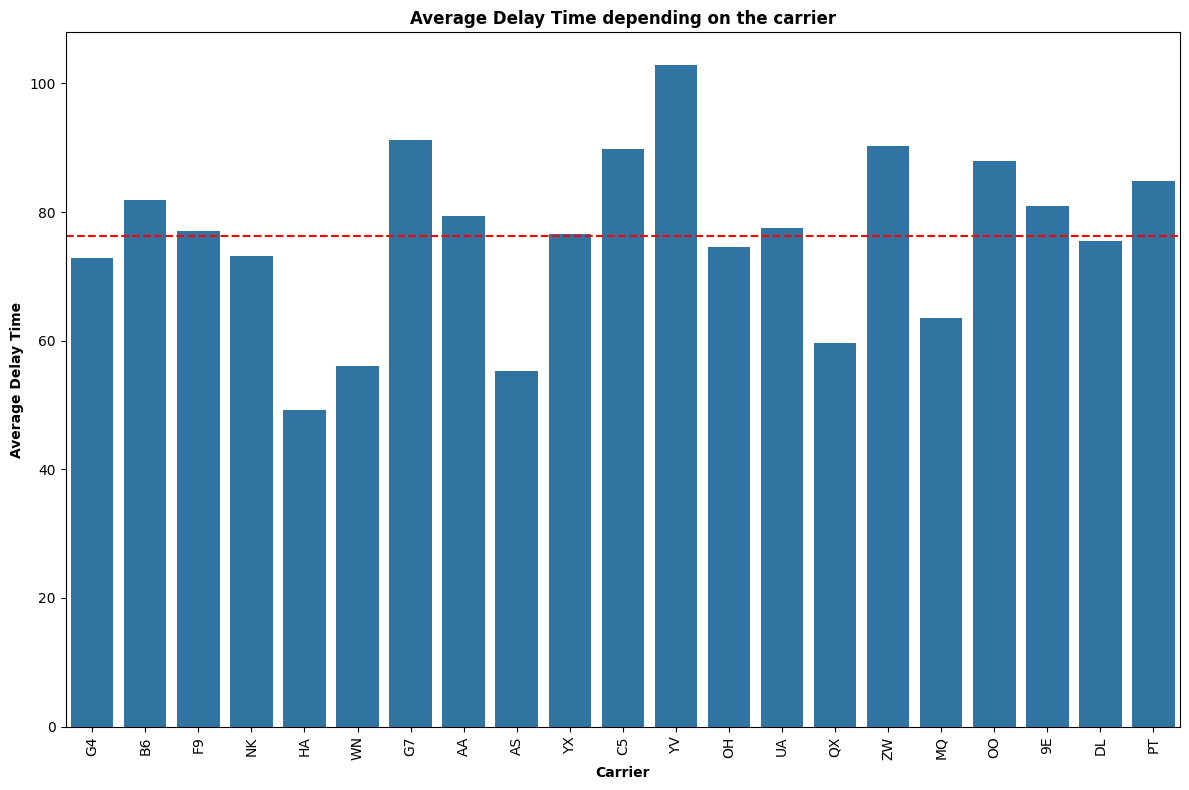

Overall Average Delay Time: 76.21


In [27]:
plt.figure(figsize = (12,8))

sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Average_Delay_Time'])
plt.xticks(rotation = 90)

# Horizontal line (overall average)
mean_avg_delay_time = carrier_ranking['Average_Delay_Time'].mean()
plt.axhline(y=mean_avg_delay_time, color='red', linestyle='--', label=f'Mean: {mean_avg_delay_time:.2f}')

plt.title('Average Delay Time depending on the carrier', fontweight = 'bold')
plt.ylabel('Average Delay Time', fontweight = 'bold')
plt.xlabel('Carrier', fontweight = 'bold')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

print('Overall Average Delay Time:', carrier_ranking['Average_Delay_Time'].mean().round(2))


### Airports with highest delays (%)

In [42]:
(df.query('ArrDelay >= 60' or 'Cancelled > 0').DistanceGroup.value_counts(normalize=True).head(10)*100).round(2).reset_index().rename(columns={'proportion': 'percent'})


,DistanceGroup,percent
0,2,21.71
1,3,19.68
2,4,17.11
3,5,13.58
4,1,12.35
5,6,4.42
6,7,4.20
7,10,2.28
8,11,1.81
9,8,1.62


### Departure vs. Arrival Delay

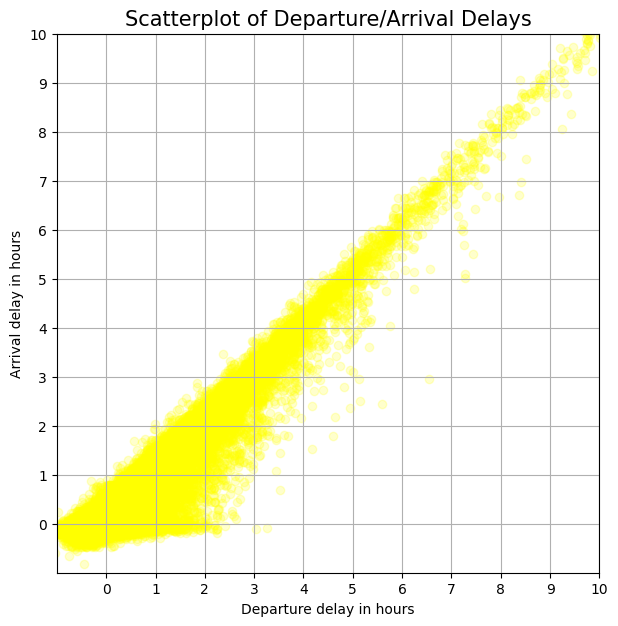

In [29]:
plt.figure(figsize=(7, 7))
plt.scatter(df.ArrDelay, df.DepDelay, c='yellow', alpha=.2)
plt.grid()
plt.xlim(-60, 600)
plt.ylim(-60, 600)
plt.xticks(np.arange(0,601, 60), labels=np.arange(0,601,60)//60)
plt.yticks(np.arange(0,601, 60), labels=np.arange(0,601,60)//60)
plt.xlabel('Departure delay in hours')
plt.ylabel('Arrival delay in hours')
plt.title('Scatterplot of Departure/Arrival Delays', fontsize=15)
plt.show()


### Causes for delay

In [30]:
df_delay = df[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].copy()
df_delay.head(5)


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,18.0,0.0,0.0
2,62.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [31]:
delay_reasons = df_delay.sum() # gives the delay in minutes

# Renaming
delay_reasons = delay_reasons.rename(index={
    'CarrierDelay': 'Carrier',
    'WeatherDelay': 'Weather',
    'NASDelay': 'National Aviation System',
    'SecurityDelay': 'Security',
    'LateAircraftDelay': 'Late Aircraft'
})


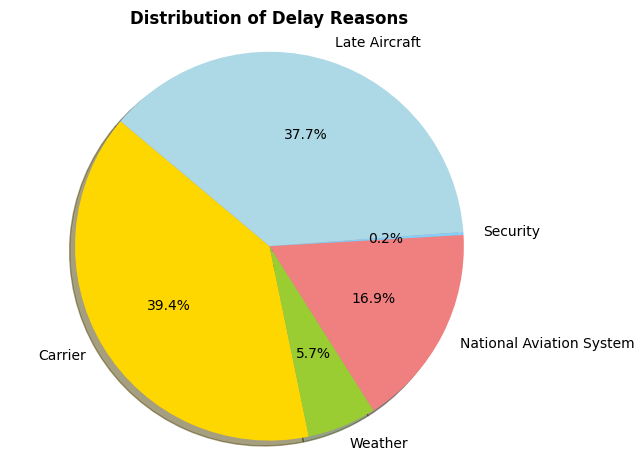

Carrier                     1294009
Late Aircraft               1240214
National Aviation System     556671
Weather                      188868
Security                       8027
dtype: int64

In [32]:
# Piechart
labels = delay_reasons.index
sizes = delay_reasons
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightblue']

plt.pie(sizes, labels = labels, colors = colors,  autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Delay Reasons', fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

display(delay_reasons.sort_values(ascending = False).astype(int))


### Airline Identifier 

In [33]:
airline_codes = pd.read_csv('L_UNIQUE_CARRIERS.csv')

# # define the majors codes from the top hits results
# majors_codes = ["WN", "DL", "AA", "OO", "UA", "YX", "B6", "MQ", "NK", "9E", "AS", "OH", "YV", "HA", "F9", "G4", "QX", "PT", "C5", "ZW", "G7"]

# filter, update, then view the list
major_airlines = airline_codes[airline_codes['Code'].isin(df['Operating_Airline '])]
major_airlines


,Code,Description
170,9E,Endeavor Air Inc.
187,AA,American Airlines Inc.
318,AS,Alaska Airlines Inc.
360,B6,JetBlue Airways
424,C5,CommuteAir LLC dba CommuteAir
550,DL,Delta Air Lines Inc.
635,F9,Frontier Airlines Inc.
682,G4,Allegiant Air
683,G7,GoJet Airlines LLC d/b/a United Express
751,HA,Hawaiian Airlines Inc.


### Delay per month / incl. categories

In [36]:
df_month = df.groupby("DayOfWeek")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay"]
df_month[col_order].style.background_gradient(cmap="Purples")


DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay
DayOfWeek,,,,
1,59.900054,18.275502,10.310850,9.040346
2,64.224806,16.923077,9.677996,7.429934
3,64.281492,16.545487,9.587988,7.208725
4,58.972635,17.547545,10.825421,9.279332
5,55.940829,18.248930,11.671933,10.841419
6,58.554804,17.920687,10.928734,9.656013
7,56.532562,18.943560,11.742402,10.031838


### Flight Delay Distribution

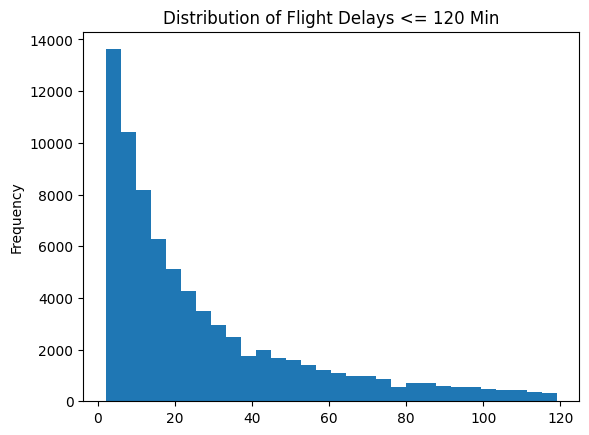

In [ ]:
df.query("ArrDelayMinutes > 1 and ArrDelayMinutes < 120")["ArrDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays <= 120 Min"
)
plt.show()


### Delay Groups

In [35]:
df["DelayGroup"] = None
df.loc[df["DepDelayMinutes"] == 0, "DelayGroup"] = "OnTime_Early"
df.loc[
    (df["DepDelayMinutes"] > 0) & (df["DepDelayMinutes"] <= 15), "DelayGroup"
] = "Small_Delay"
df.loc[
    (df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"
] = "Medium_Delay"
df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"] == 1, "DelayGroup"] = "Cancelled"


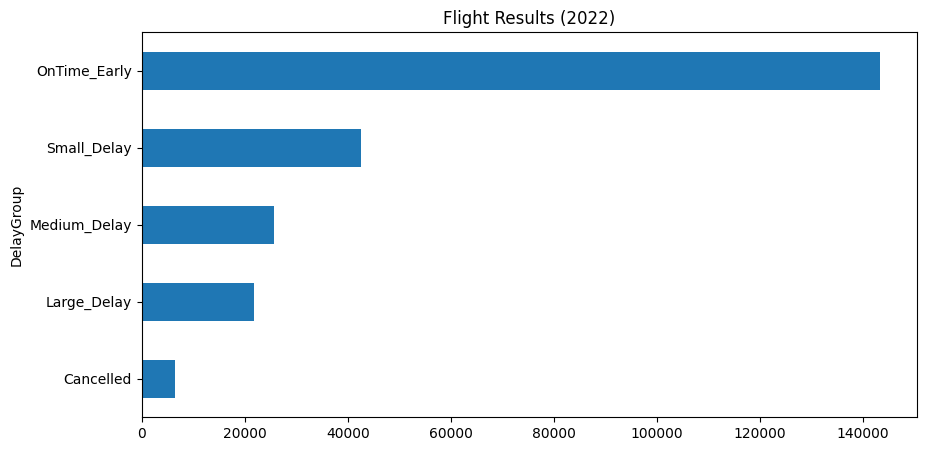

In [ ]:
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), title="Flight Results (2022)"
)
plt.show()


### Cancelled Flights

In [ ]:
print(df['Cancelled'].value_counts())
print('Percent Cancelled :', round(sum(df['Cancelled'] == True) / len(df['Cancelled']) * 100, 2), '% of all flights')


0.0    233484
1.0      6516
Name: Cancelled, dtype: int64
Percent Cancelled : 2.71 % of all flights


### Various types of delays per airline

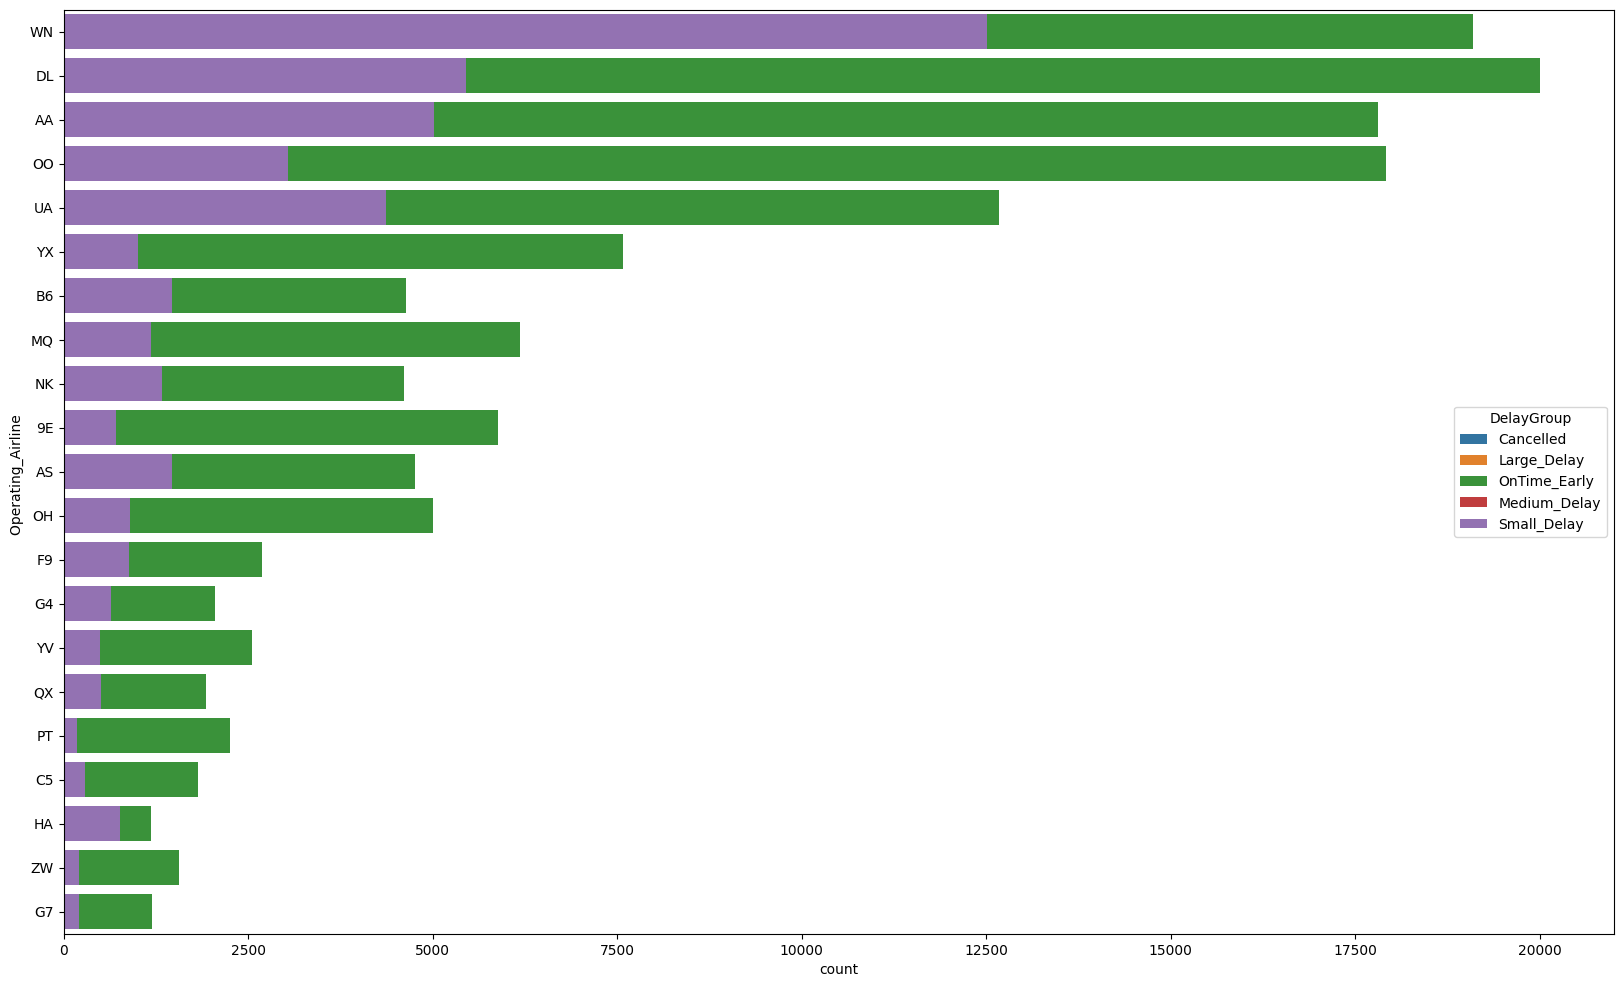

In [ ]:
plt.figure(figsize=(20,12))
airline_order = df['Operating_Airline '].value_counts().index.tolist()
sns.countplot(data=df, y='Operating_Airline ', order=airline_order, hue='DelayGroup', dodge=False)
plt.show()


### Correlation Matrix

In [ ]:
df_heatmap = df[['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Dest', 'DepDelayMinutes', 'ArrDelayMinutes','Cancelled',  'AirTime', 'Distance', 'DistanceGroup']]

df_heatmap.shape


(240000, 11)

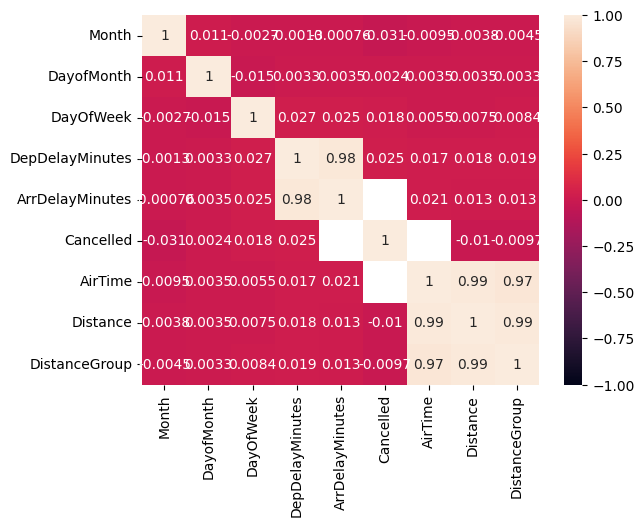

In [ ]:
heatmap = sns.heatmap(df_heatmap.corr(), vmin=-1, vmax=1, annot=True)
